In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import Leadangle_wave as Wave
from Leadangle_fit_JunoUVS import calc_eqlead
from scipy.io import readsav
from UniversalColor import UniversalColor
from SharedX import ShareXaxis
from legend_shadow import legend_shadow
import JupiterMag as jm

UC = UniversalColor()
UC.set_palette()

F = ShareXaxis()
F.fontsize = 15
F.fontname = 'Liberation Sans Narrow'
F.set_default()

Importing Library
done


In [2]:
target_moon = 'Europa'
target_fp = 'MAW'

In [3]:
# %% Constants
MU0 = 1.26E-6            # 真空中の透磁率
AMU2KG = 1.66E-27        # 原子質量をkgに変換するファクタ [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
MJ = 1.90E+27            # JUPITER MASS [kg]
C = 2.99792E+8           # LIGHT SPEED [m/s]
G = 6.67E-11             # 万有引力定数  [m^3 kg^-1 s^-2]

Psyn_io = (12.89)*3600      # Moon's synodic period [sec]
Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

if target_moon == 'Io':
    Psyn = Psyn_io
    r_moon = 5.9*RJ
elif target_moon == 'Europa':
    Psyn = Psyn_eu
    r_moon = 9.4*RJ
elif target_moon == 'Ganymede':
    Psyn = Psyn_ga
    r_moon = 15.0*RJ

In [4]:
# Moon position when the Alfven waves launched (Time: t0-tau_A)
r_A0_arr = r_moon*np.ones(55)
S3wlon_A0_arr = np.linspace(-50,390,r_A0_arr.size)

# Jan 2014 best-fit parameters from Satoh+2024
rho_best = 1207     # [amu cm-3]
Ai_best = 18        # [amu]
Ti_best = 87        # [eV]
ni_best = rho_best/Ai_best  # [cm-3]
Hp_best = 0.64*RJ*math.sqrt(Ti_best/Ai_best)
print('Number density [cm-3]:', ni_best)
print('Temperature [eV]:', Ti_best)
print('Scale height [RJ]:', Hp_best/RJ)

eqlead_bestfit_14N = np.zeros(r_A0_arr.size)
eqlead_bestfit_14S = np.zeros(r_A0_arr.size)
for i in range(r_A0_arr.size):
    r_A0 = r_A0_arr[i]
    S3wlon_A0 = S3wlon_A0_arr[i]
    S_A0 = Wave.Awave().tracefield(r_A0,
                                np.radians(S3wlon_A0),
                                0
                                )
    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                        np.radians(S3wlon_A0),
                                        0,
                                        S_A0,
                                        Ai_best,
                                        ni_best,
                                        Hp_best,
                                        -1,
                                        )
    
    eqlead_bestfit_14N[i] = tau*360/Psyn     # [deg]

    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                        np.radians(S3wlon_A0),
                                        0,
                                        S_A0,
                                        Ai_best,
                                        ni_best,
                                        Hp_best,
                                        1,
                                        )
    
    eqlead_bestfit_14S[i] = tau*360/Psyn     # [deg]

Number density [cm-3]: 67.05555555555556
Temperature [eV]: 87
Scale height [RJ]: 1.4070299688824446


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


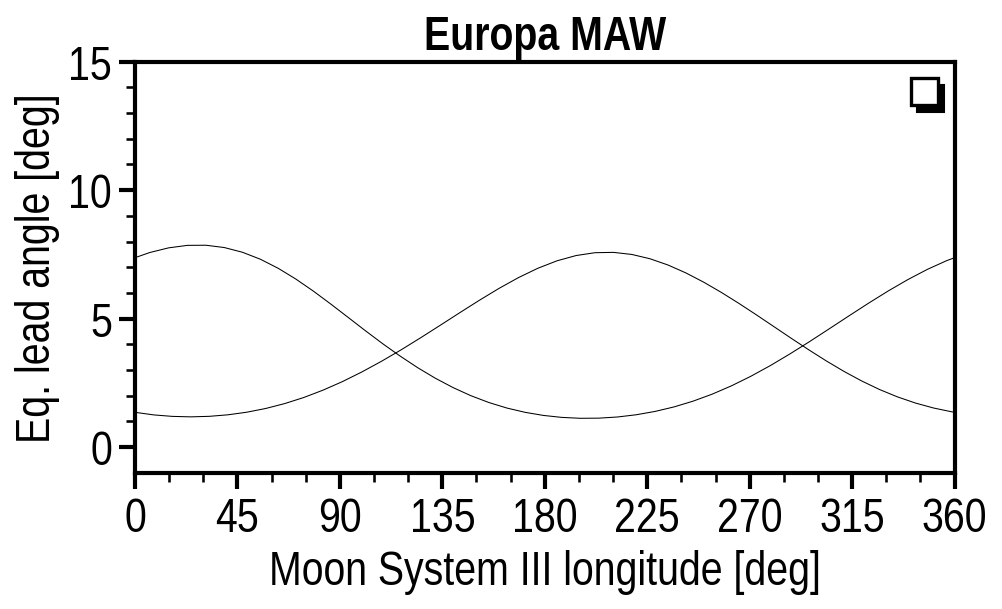

In [5]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target_moon == 'Io':
    ymax = 12
elif target_moon == 'Europa':
    ymax = 15
elif target_moon == 'Ganymede':
    ymax = 40

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_14N, eqlead_bestfit_14N, color='k', linewidth=0.5)
F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_14S, eqlead_bestfit_14S, color='k', linewidth=0.5)

F.ax.set_title(target_moon+' '+target_fp, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

In [6]:
# Moon position when the Alfven waves launched (Time: t0-tau_A)
r_A0_arr = r_moon*np.ones(55)
S3wlon_A0_arr = np.linspace(-50,390,r_A0_arr.size)

# Jan 2014 best-fit parameters from Satoh+2024
rho_best = 1708     # [amu cm-3]
Ai_best = 18        # [amu]
Ti_best = 195       # [eV]
ni_best = rho_best/Ai_best  # [cm-3]
Hp_best = 0.64*RJ*math.sqrt(Ti_best/Ai_best)
print('Number density [cm-3]:', ni_best)
print('Temperature [eV]:', Ti_best)
print('Scale height [RJ]:', Hp_best/RJ)

eqlead_bestfit_22N = np.zeros(r_A0_arr.size)
eqlead_bestfit_22S = np.zeros(r_A0_arr.size)
for i in range(r_A0_arr.size):
    r_A0 = r_A0_arr[i]
    S3wlon_A0 = S3wlon_A0_arr[i]
    S_A0 = Wave.Awave().tracefield(r_A0,
                                np.radians(S3wlon_A0),
                                0
                                )
    # print('Starting point [RJ]:', S_A0/RJ)
    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                        np.radians(S3wlon_A0),
                                        0,
                                        S_A0,
                                        Ai_best,
                                        ni_best,
                                        Hp_best,
                                        -1,
                                        )
    
    eqlead_bestfit_22N[i] = tau*360/Psyn     # [deg]

    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                        np.radians(S3wlon_A0),
                                        0,
                                        S_A0,
                                        Ai_best,
                                        ni_best,
                                        Hp_best,
                                        1,
                                        )
    
    eqlead_bestfit_22S[i] = tau*360/Psyn     # [deg]

Number density [cm-3]: 94.88888888888889
Temperature [eV]: 195
Scale height [RJ]: 2.1064978835340264


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


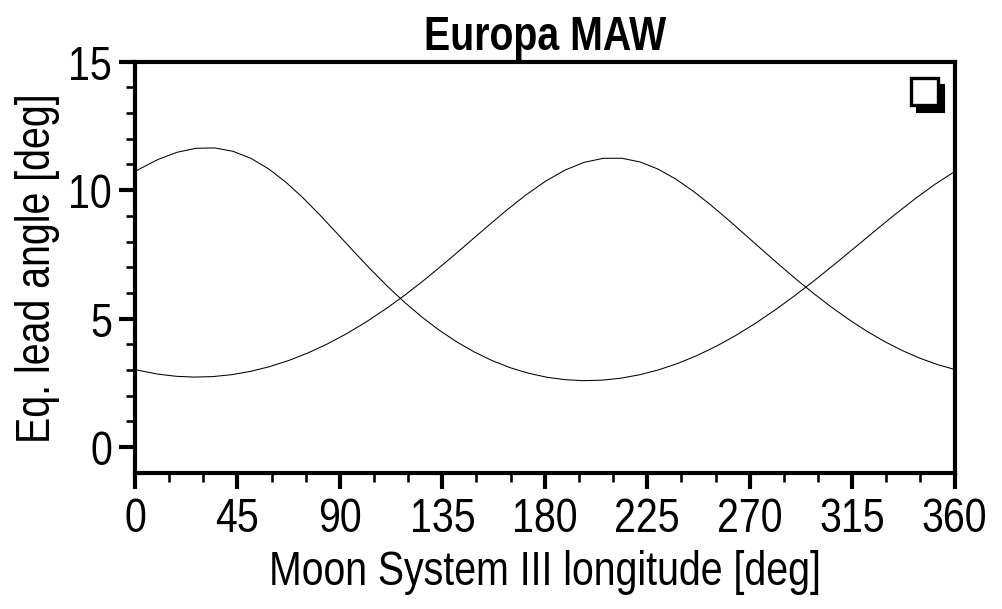

In [7]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target_moon == 'Io':
    ymax = 12
elif target_moon == 'Europa':
    ymax = 15
elif target_moon == 'Ganymede':
    ymax = 40

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_22N, eqlead_bestfit_22N, color='k', linewidth=0.5)
F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_22S, eqlead_bestfit_22S, color='k', linewidth=0.5)

F.ax.set_title(target_moon+' '+target_fp, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

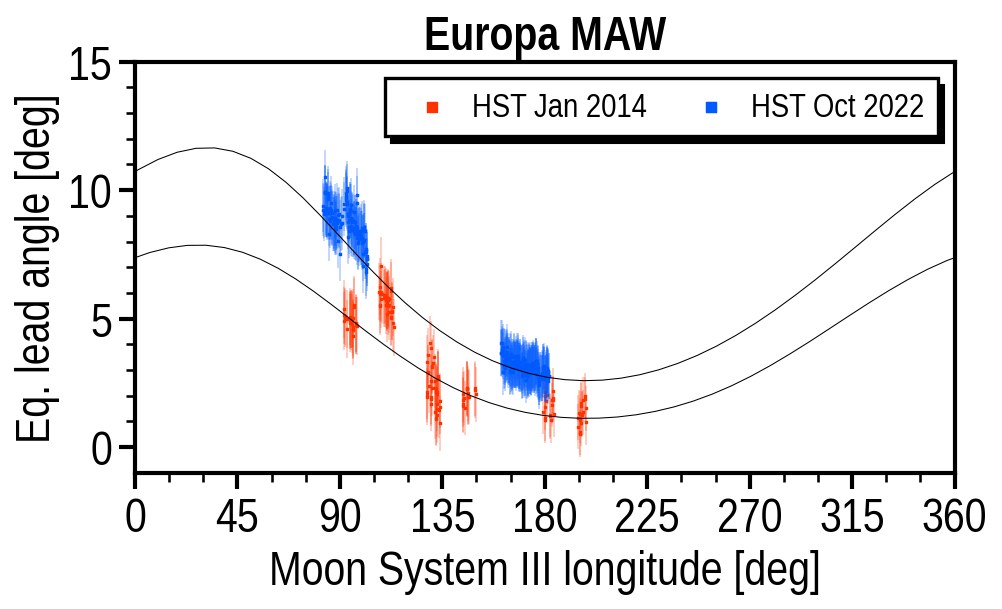

In [8]:
north_doy14 = ['14/006_v06', '14/013_v13', '14/016_v12']
north_doy22 = ['22/271_v18', '22/274_v17']

F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target_moon == 'Io':
    ymax = 12
elif target_moon == 'Europa':
    ymax = 15
elif target_moon == 'Ganymede':
    ymax = 40

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

# North - 2014
doyname = ['2014-01-06', '2014-01-13', '2014-01-16']
la_err = np.array([1.0614052546455, 1.1145213015136, 0.8732066510795])
for i in range(len(north_doy14)):
    data_arr = np.loadtxt('data/red3_leadangle/EUROPA/20'+north_doy14[i]+'_eq.txt')
    moons30_arr = data_arr[0,:]    # moon s3 longitude [deg]
    eq_leadangle = data_arr[1,:]   # lead angle [deg]
    sc14 = F.ax.scatter(moons30_arr, eq_leadangle, marker=',', s=0.9, c=UC.red,
                linewidths=0.65, zorder=1)
    F.ax.errorbar(moons30_arr, eq_leadangle, yerr=la_err[i]*np.ones(moons30_arr.shape),
                linestyle='none', ecolor=UC.red, elinewidth=0.22, marker='none', zorder=1)
    if i == 0:
        sc14.set_label('HST Jan 2014')

# North - 2022
doyname = ['2022-09-28', '2022-10-01']
la_err = np.array([1.0478863038047, 0.8994575700965])
for i in range(len(north_doy22)):
    data_arr = np.loadtxt('data/red3_leadangle/EUROPA/20'+north_doy22[i]+'_eq.txt')
    moons30_arr = data_arr[0,:]   # moon s3 longitude [deg]
    eq_leadangle = data_arr[1,:]   # lead angle [deg]
    sc22 = F.ax.scatter(moons30_arr, eq_leadangle, marker=',', s=0.9, c=UC.blue,
                  linewidths=0.7, zorder=1.5)
    F.ax.errorbar(moons30_arr, eq_leadangle, yerr=la_err[i]*np.ones(moons30_arr.shape),
                   linestyle='none', ecolor=UC.blue, elinewidth=0.22, marker='none', zorder=1.5)
    if i == 0:
        sc22.set_label('HST Oct 2022')


F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_14N, eqlead_bestfit_14N, color='k', linewidth=0.5)
F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_22N, eqlead_bestfit_22N, color='k', linewidth=0.5)

F.ax.set_title(target_moon+' '+target_fp, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

### PJ08のデータを整理する

In [12]:
def read1savfile(PJnum: int, moon: str, footprint: str, savpath='none'):
    """
    Args:
        `PJnum` (int): Perijove number \\
        `moon` (str): Name of the target (Io/Europa/Ganymede) \\
        `footprint` (str): `MAW` or `TEB` \\

    Returns:
        Tuple of \\
        `wlon_MAW` (ndarray) \\
        `wlon_TEB` (ndarray) \\
        `err_wlon_MAW` (ndarray) \\
        `err_wlon_TEB` (ndarray) \\
        `lat_MAW` (ndarray) \\
        `lat_TEB` (ndarray) \\
        `err_lat_MAW` (ndarray) \\
        `err_lat_TEB` (ndarray) \\
        `wlon_moon` (ndarray) \\
        `et` (ndarray) \\
        `hem` (ndarray) \\
    """
    # size of the data
    datasize = 0

    if savpath == 'none':
        # Look for the file named
        # `IFP_info_v900km_fixed.sav` for Io footprint
        savpath = 'data/Output_v2_PaperHue2023/' + 'PJ' + \
            str(PJnum).zfill(2)+'/'+moon[0]+'FP_info_v900km_fixed.sav'

    # Read
    savdata = readsav(savpath)

    var = savdata['fp_info']

    # 'MIDTIME_ET'を用いてスライス位置を決定する
    MIDTIME_ET = np.array(var['MIDTIME_ET'][0])
    idx = np.where(MIDTIME_ET > 0)

    wlon_fp = np.array(var['LON_'+footprint][0])[idx]
    err_wlon_fp = np.array(var['LON_'+footprint+'_ERROR'][0])[idx]
    lat_fp = np.array(var['LAT_'+footprint][0])[idx]
    err_lat_fp = np.array(var['LAT_'+footprint+'_ERROR'][0])[idx]
    wlon_moon = np.array(var['SIII_LON'][0])[idx]
    et = np.array(var['MIDTIME_ET'][0])[idx]
    hem = var['HEMISPHERE'][0][idx]

    # Extract MAWs (exclude values -999.)
    fpvalues = np.where((wlon_fp > -100))
    wlon_fp = wlon_fp[fpvalues]
    err_wlon_fp = err_wlon_fp[fpvalues]
    lat_fp = lat_fp[fpvalues]
    err_lat_fp = err_lat_fp[fpvalues]
    wlon_moon = wlon_moon[fpvalues]
    et = et[fpvalues]
    hem = hem[fpvalues]

    # 磁場ベクトルに対する南北で判別する
    # North -> -1 / South -> 1
    hem_N = np.where(hem == b'North')
    hem_S = np.where(hem == b'South')
    hem[hem_N] = -1
    hem[hem_S] = 1

    return wlon_fp, err_wlon_fp, lat_fp, err_lat_fp, wlon_moon, et, hem

In [21]:
TARGET_MOON = 'Europa'
TARGET_FP = 'MAW'
i = 8

savpath = 'data/Output_v2_PaperHue2023/PJ08/Europa_Backup/EFP_info_v900km_fixed.sav'

wlon_fp1, err_wlon_fp1, lat_fp1, err_lat_fp1, moon_S3wlon_obs, et_fp1, hem_obs = read1savfile(
            PJnum=i, moon=TARGET_MOON, footprint=TARGET_FP, savpath=savpath)

print(wlon_fp1.shape)

eqlead_obs, sigma_obs, _, wlon_fp_eq = calc_eqlead(wlon_fp1,
                                                    err_wlon_fp1,
                                                    lat_fp1,
                                                    err_lat_fp1,
                                                    hem_obs,
                                                    moon_S3wlon_obs,
                                                    TARGET_MOON)

for i in range(wlon_fp1.size):
    print(wlon_fp1[i], lat_fp1[i], et_fp1[i], hem_obs[i])

(30,)
125.39552 77.1713 557569126.2684132 -1
128.62071 72.026245 557570030.7630402 -1
129.35503 71.05778 557570151.3623155 -1
130.07097 67.42723 557571025.5571146 -1
130.33292 67.14554 557571085.7567617 -1
132.8397 64.85514 557571809.0524727 -1
133.11815 64.81517 557571869.35208 -1
133.42433 64.570816 557571989.85138 -1
96.288475 -69.130745 557577316.6197276 1
97.55018 -69.287315 557577497.4186347 1
101.64265 -70.12105 557578040.0154141 1
102.37498 -70.11746 557578100.3150518 1
102.52402 -70.157616 557578160.6147047 1
103.13758 -70.43554 557578220.9143424 1
103.70148 -70.477486 557578281.2139802 1
104.191246 -70.5593 557578341.5136331 1
105.37939 -70.84146 557578462.1129086 1
105.93289 -70.98556 557578522.4125617 1
106.2068 -71.05236 557578582.7121993 1
107.24292 -71.24283 557578703.3114595 1
107.38583 -71.28887 557578763.6110973 1
107.89094 -71.36777 557578823.9107502 1
108.46266 -71.50941 557578884.210388 1
108.93846 -71.661194 557578944.6100316 1
114.14049 -72.87822 557579487.406807

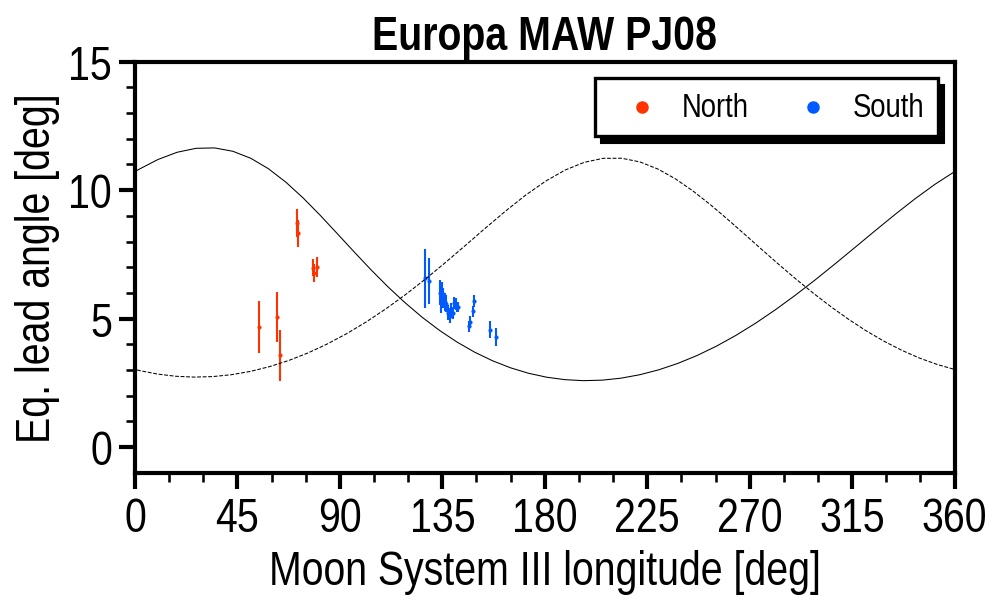

In [27]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target_moon == 'Io':
    ymax = 12
elif target_moon == 'Europa':
    ymax = 15
elif target_moon == 'Ganymede':
    ymax = 40

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

north = np.where((hem_obs==-1))
F.ax.scatter(moon_S3wlon_obs[north], eqlead_obs[north], 
             s=1, color=UC.red,
             label='North',
             zorder=0.7)
F.ax.errorbar(moon_S3wlon_obs[north], eqlead_obs[north], 
            yerr=np.array([np.abs(sigma_obs[north]), 
                            np.abs(sigma_obs[north])]),
            linewidth=0., markersize=2,
            elinewidth=1.0, color=UC.red,
            zorder=0.7)

south = np.where((hem_obs==1))
F.ax.scatter(moon_S3wlon_obs[south], eqlead_obs[south], 
             s=1, color=UC.blue,
             label='South',
             zorder=0.7)
F.ax.errorbar(moon_S3wlon_obs[south], eqlead_obs[south], 
            yerr=np.array([np.abs(sigma_obs[south]), 
                            np.abs(sigma_obs[south])]),
            linewidth=0., markersize=2,
            elinewidth=1.0, color=UC.blue,
            zorder=0.7)

F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_22N, eqlead_bestfit_22N, color='k', linewidth=0.5)
F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_22S, eqlead_bestfit_22S, color='k', linewidth=0.5, linestyle='--')

F.ax.set_title(target_moon+' '+target_fp+' PJ08', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

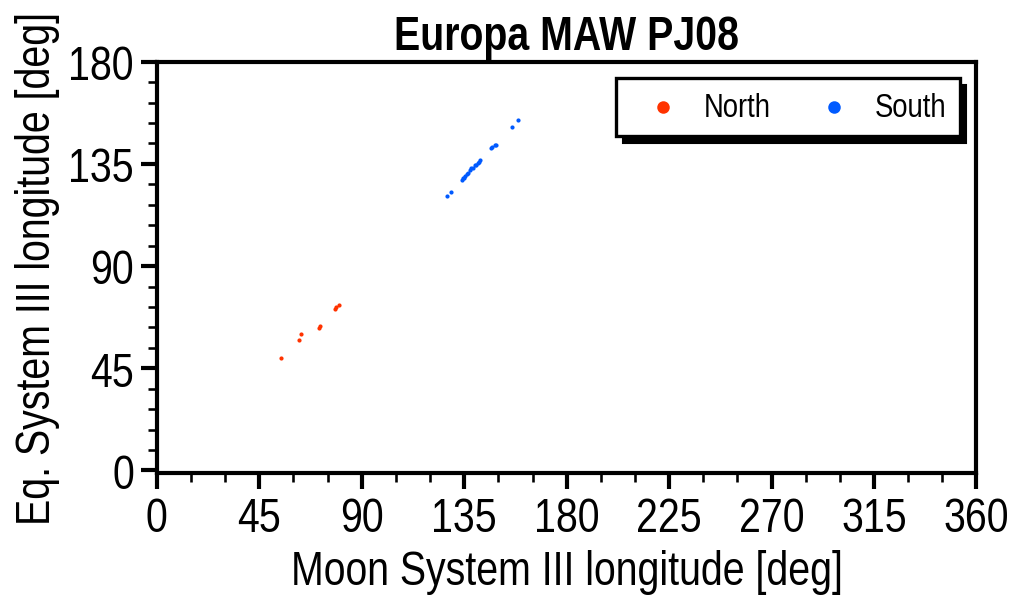

In [ ]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 180

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. System III longitude [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,45),
            ticklabels=np.arange(0,ymax+1,45),
            minor_num=5)

north = np.where((hem_obs==-1))
F.ax.scatter(moon_S3wlon_obs[north], wlon_fp_eq[north], 
             s=1, color=UC.red,
             label='North',
             zorder=0.7)

south = np.where((hem_obs==1))
F.ax.scatter(moon_S3wlon_obs[south], wlon_fp_eq[south], 
             s=1, color=UC.blue,
             label='South',
             zorder=0.7)

F.ax.set_title(target_moon+' '+target_fp+' PJ08', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
#legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

In [22]:
# dynamically flattened Jupiter 
s3wlon = np.radians(128.75)
s3lat = np.radians(72.04) # latitude[rad]
rs = np.sqrt((RJ * np.cos(s3lat)) ** 2 + (RJ * np.sin(s3lat) * 14.4 / 15.4) ** 2)  # radius of surface [m]

_, phi, _, _ = Wave.Awave().trace3_reverse(rs+900*1E+3,
                                    s3wlon,
                                    s3lat,
                                    1,
                                    1,
                                    1,
                                    1,
                                    1,
                                    )
print(-np.degrees(phi))

RJ: 11.334890046488583
55.329266713840255


In [21]:
s3wlon = np.radians(326.6025957)
s3lat = np.radians(85.00893227) # latitude[rad]
rs = np.sqrt((RJ * np.cos(s3lat)) ** 2 + (RJ * np.sin(s3lat) * 14.4 / 15.4) ** 2)  # radius of surface [m]
print(rs/RJ)
# rs = 0.93849501*RJ

_, phi, _, _ = Wave.Awave().trace3_reverse(rs+900*1E+3,
                                    s3wlon,
                                    s3lat,
                                    1,
                                    1,
                                    1,
                                    1,
                                    1,
                                    )
print(-np.degrees(phi))
print(360-np.degrees(phi))

0.9355733612077389


RJ: 9.670018725715245
4.473080464822434
364.47308046482243
